<a href="https://colab.research.google.com/github/Codechickdev/ML_Projects/blob/main/Twitter_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Stock Analysis and Prediction

## Reference Link
- [Dataset](https://www.kaggle.com/datasets/whenamancodes/twitter-stock-market-analysis-founding-years)

## Todo
- [x] Install Packages
- [x] Import Packages
- [x] Download and Load Dataset
- [x] Data Analysis
    - [ ] Exploration and Visualization
    - [ ] Preprocessing and Feature Engineering
- [ ] Model Traning
- [ ] Evaluation

### Install Packages

In [1]:
!pip install opendatasets --quiet

### Import Packages

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

import opendatasets as od

sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

### Download and Load Dataset

In [3]:
URL = 'https://www.kaggle.com/datasets/whenamancodes/twitter-stock-market-analysis-founding-years'

od.download(URL)

100%|██████████| 44.2k/44.2k [00:00<00:00, 11.5MB/s]

In [4]:
df = pd.read_csv('/content/twitter-stock-market-analysis-founding-years/TWTR.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-09,45.590000,49.840000,45.020000,49.139999,49.139999,17366614
1,2013-12-10,48.900002,52.580002,48.700001,51.990002,51.990002,25792002
2,2013-12-11,52.400002,53.869999,51.000000,52.340000,52.340000,26631535
3,2013-12-12,52.200001,55.869999,50.689999,55.330002,55.330002,23446870
4,2013-12-13,56.200001,59.410000,55.450001,59.000000,59.000000,38979567


### Data Analysis

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2.238000e+03
mean,35.961396,36.635702,35.285190,35.944794,35.944794,2.181679e+07
std,14.170256,14.422235,13.881306,14.141829,14.141829,1.904111e+07
min,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,25.402499,25.970000,24.692501,25.267500,25.267500,1.247043e+07
50%,35.264999,35.970001,34.692501,35.359999,35.359999,1.703495e+07
75%,44.209999,45.000000,43.372500,44.147501,44.147501,2.429828e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2238 non-null   datetime64[ns]
 1   Open       2238 non-null   float64       
 2   High       2238 non-null   float64       
 3   Low        2238 non-null   float64       
 4   Close      2238 non-null   float64       
 5   Adj Close  2238 non-null   float64       
 6   Volume     2238 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 122.5 KB


### Exploration and Visualization

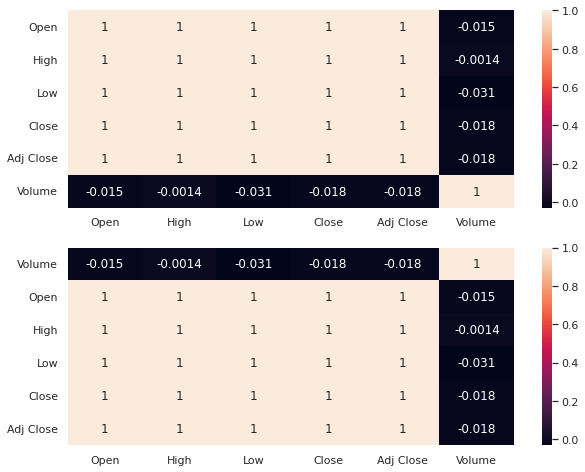

<Figure size 720x576 with 0 Axes>

In [13]:
fig, axes = plt.subplots(2)

sns.heatmap(df.corr(), annot = True, ax = axes[0])
sns.heatmap(df.corr().sort_values(by = 'Close'), annot = True, ax = axes[1])
plt.figure(figsize = [10, 8])
plt.show()

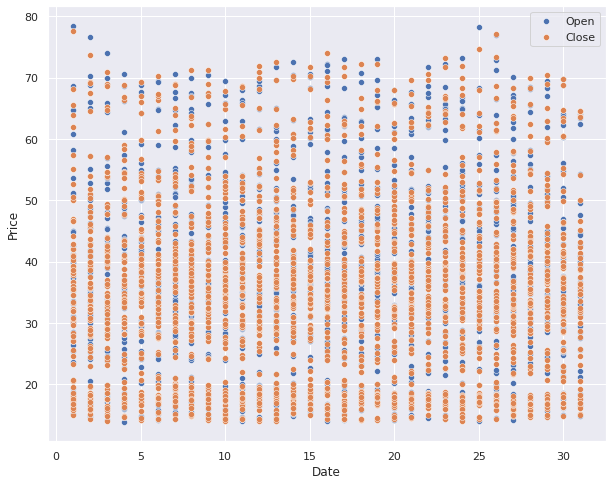

In [20]:
sns.scatterplot(df['Date'].dt.day, df['Open'])
sns.scatterplot(df['Date'].dt.day, df['Close'])
plt.ylabel('Price')
plt.legend(['Open', 'Close'])
plt.show()

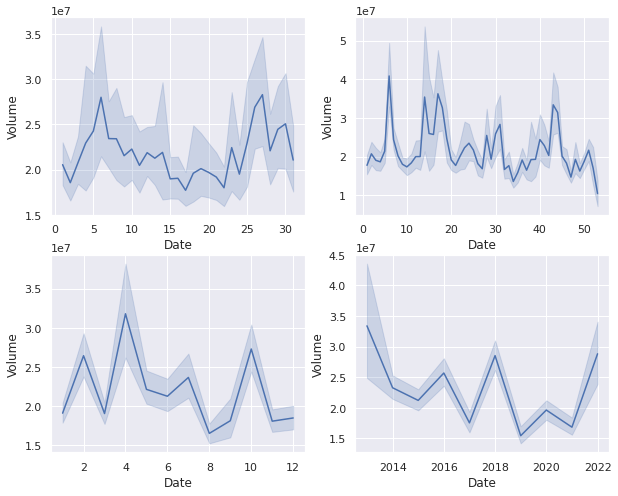

In [26]:
fig, ax = plt.subplots(2, 2)
sns.lineplot(x = df['Date'].dt.day, y = df['Volume'], ax = ax[0, 0])
sns.lineplot(x = df['Date'].dt.week, y = df['Volume'], ax = ax[0, 1])
sns.lineplot(x = df['Date'].dt.month, y = df['Volume'], ax = ax[1, 0])
sns.lineplot(x = df['Date'].dt.year, y = df['Volume'], ax = ax[1, 1])
plt.show()

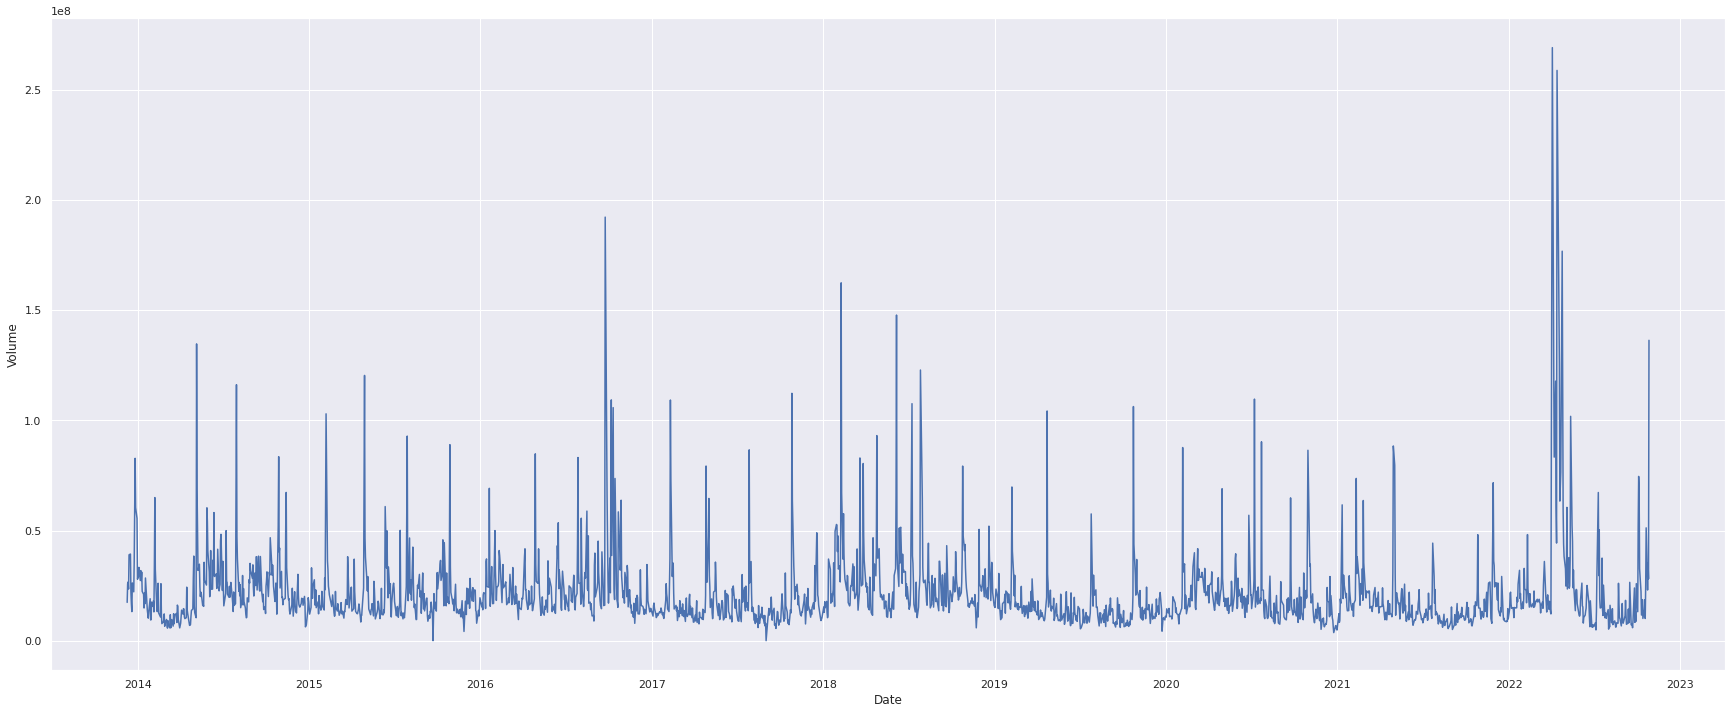

In [30]:
plt.figure(figsize = (30, 12))
sns.lineplot(x = df['Date'], y = df['Volume'])
plt.show()

### Preprocessing and Feature Enginneering

In [9]:
class ChangeDate(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        df = X.copy()
        df['Day'] = df['Date'].dt.day
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Week'] = df['Date'].dt.week
        df['Weekday'] = df['Date'].dt.weekday
        df = df.drop(['Date'], axis = 1)
        return df

In [20]:
class Scaling(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        # df = X.drop('Date', axis = 1)
        scaler = MinMaxScaler()
        df = scaler.fit_transform(X)
        return df

In [21]:
class SplitData(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        i = pd.DataFrame(X)
        features, label = i.drop([4], axis = 1), i[4]
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 4)
        return (X_train, X_test, y_train, y_test)

In [26]:
preprocessing_pipeline = Pipeline([
    ('changing', ChangeDate()),
    ('scaling', Scaling()),
    ('spliting', SplitData())
])

In [27]:
copiedDf = df.copy()

In [28]:
X_train, X_test, y_train, y_test = preprocessing_pipeline.fit_transform(copiedDf)
len(X_train), len(X_test), len(y_train), len(y_test)

(1790, 448, 1790, 448)